In [1]:
import pandas as pd

In [2]:
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_excel("sales.xlsx", engine="openpyxl")

In [ ]:
df.head()

,OrderNumber,OrderDate,Customer Names,Channel,City,Product Name,Order Quantity,Unit Selling Price,Unit Cost,Total Sales,Profit,Profit Margin (%)
0,SO - 000225,2017-01-01,Dharma Ltd,Wholesale,Queenstown-Lakes,Product 11,6,2499.1,1824.343,14994.6,4048.542,27.0
1,SO - 0003378,2017-01-01,New Ltd,Distributor,Christchurch,Product 7,11,2351.7,1269.918,25868.7,11899.602,46.0
2,SO - 0003901,2017-01-01,Medline,Wholesale,Hamilton,Product 13,5,1728.6,1019.874,8643.0,3543.630,41.0
3,SO - 0005126,2017-01-01,Procter Corp,Wholesale,Timaru,Product 7,6,978.2,684.740,5869.2,1760.760,30.0
4,SO - 0005614,2017-01-01,Wuxi Group,Export,Waitakere,Product 6,7,2338.3,1028.852,16368.1,9166.136,56.0


In [ ]:
# Supprimer les doublons
df = df.drop_duplicates()

In [ ]:
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(subset=["OrderDate", "Total Sales", "Profit"])

In [ ]:
# Conversion de la date en format datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

In [ ]:
# Créer une table de dates à partir des dates de commande
#min cherche la plus ancienne date de commande
#max cherche la date la plus récente
min_date = df["OrderDate"].min()
max_date = df["OrderDate"].max()
#pour generer une listes des dates entre les deux extremes date (debut et fin)
date_range = pd.date_range(start=min_date, end=max_date)

date_table = pd.DataFrame({
    "Date": date_range
})
date_table["Année"] = date_table["Date"].dt.year
date_table["trimestre"] = date_table["Date"].dt.quarter
date_table["Mois"] = date_table["Date"].dt.month 
date_table["jour"] = date_table["Date"].dt.day



In [ ]:
# Ajouter les colonnes année et mois dans la table principale
df["Année"] = df["OrderDate"].dt.year
df["trimestre"] = df["OrderDate"].dt.quarter
df["Mois"] = df["OrderDate"].dt.month
df["jour"] = df["OrderDate"].dt.day

In [ ]:
# Calculs de base
ventes_totales = df["Total Sales"].sum()
print(f"valeur totale des ventes: {ventes_totales}")



valeur totale des ventes: 154573140.60000002


In [ ]:
profit_total = df["Profit"].sum()
print(f"le bénéfice total réalisé en fonction des données de vente : {profit_total}")

le bénéfice total réalisé en fonction des données de vente : 57789142.907


In [ ]:
nombre_commandes = df["OrderNumber"].nunique()
print(f"nombre total commande : {nombre_commandes}")

nombre total commande : 7991


In [ ]:
#la marge bénéficiaire globale en pourcentage
marge= profit_total/ventes_totales * 100
print(f"Marge bénéficiaire : {marge:.2f}%")

Marge bénéficiaire : 37.39%


In [ ]:
df.sample(1)

,OrderNumber,OrderDate,Customer Names,Channel,City,Product Name,Order Quantity,Unit Selling Price,Unit Cost,Total Sales,Profit,Profit Margin (%),Année,Mois,trimestre,jour
3250,SO - 0004279,2018-03-08,Pacific Ltd,Distributor,Tasman,Product 2,6,3678.3,3052.989,22069.8,3751.866,17.0,2018,3,1,8


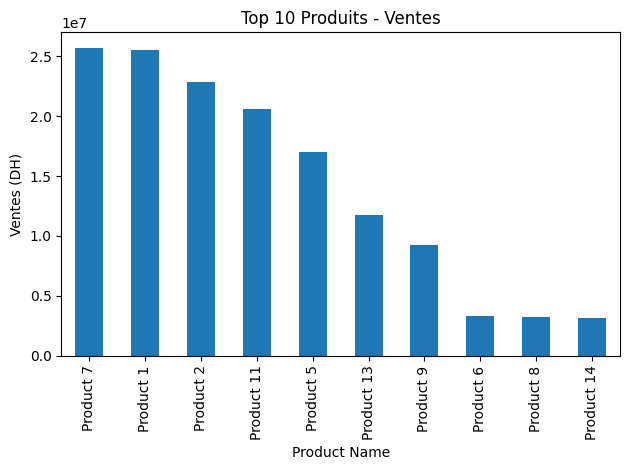

In [ ]:
# pour chaque produit on fait la somme des ventes et on trie les produits par ventes du plus vendu au moins
ventes_par_produit = df.groupby("Product Name")["Total Sales"].sum().sort_values(ascending=False)
ventes_par_produit.head(10).plot(kind="bar", title="Top 10 Produits - Ventes")
#pour l'affichage en graphe
plt.ylabel("Ventes (DH)")
plt.tight_layout()
plt.show()

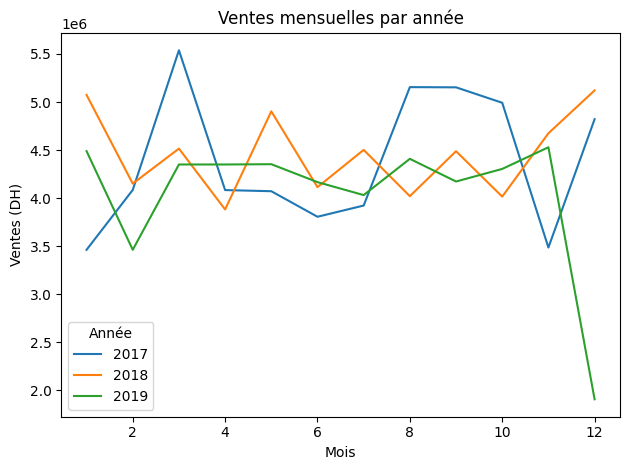

In [ ]:
# on calcule la somme des ventes pour chaque mois
ventes_mensuelles = df.groupby(["Année", "Mois"])["Total Sales"].sum().unstack(0)# cette méthode transforme l’année ("Année") en colonnes et les mois restent en lignes
ventes_mensuelles.plot(title="Ventes mensuelles par année")
plt.ylabel("Ventes (DH)")
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['OrderNumber', 'OrderDate', 'Customer Names', 'Channel', 'City',
       'Product Name', 'Order Quantity', 'Unit Selling Price', 'Unit Cost',
       'Total Sales', 'Profit', 'Profit Margin (%)', 'Année', 'Mois',
       'trimestre', 'jour'],
      dtype='object')


In [ ]:
#visualisation présentant les 5 premières villes en fonction des ventes
top_villes= df.groupby("City")["Total Sales"].sum().sort_values(ascending=False).head(5)
print(f"les 5 principales villes : {top_villes}")

les 5 principales villes : City
Christchurch    11526693.4
Hamilton        11490895.3
Waitakere       11193020.0
Manukau          9759802.9
Napier           7748503.1
Name: Total Sales, dtype: float64


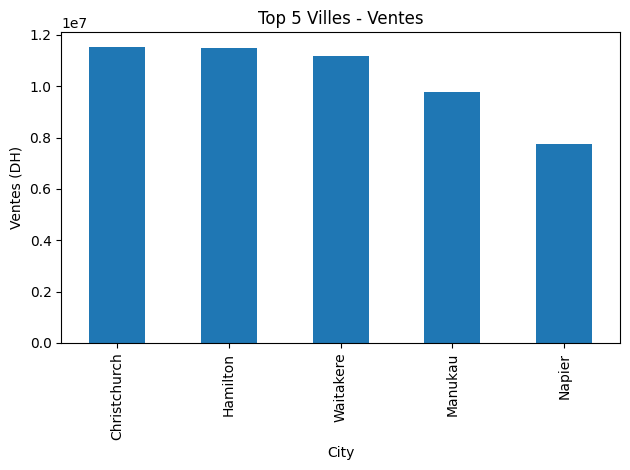

In [ ]:
top_villes.plot(kind="bar", title="Top 5 Villes - Ventes")
plt.ylabel("Ventes (DH)")
plt.tight_layout()
plt.show()

In [ ]:
#les bénéfices générés par chaque canal entre la période sélectionnée et l’année précédente,

bene_channel=df.groupby(["Channel","Année"])["Profit"].sum().unstack()
print(f"Bénéfice par channel et par année: {bene_channel}")

Bénéfice par channel et par année: Année                2017          2018         2019
Channel                                             
Distributor  6.252126e+06  6.317647e+06  5856389.131
Export       3.346461e+06  2.495570e+06  2786413.353
Wholesale    1.007918e+07  1.097597e+07  9679378.713


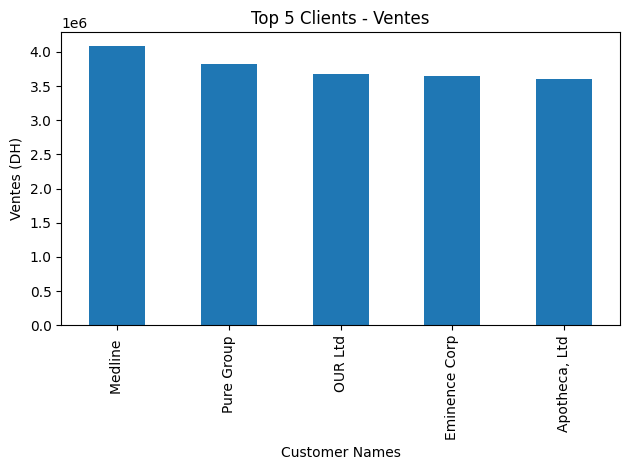

In [ ]:
# les top 5 des ventes par client
top_clients = df.groupby("Customer Names")["Total Sales"].sum().sort_values(ascending=False).head(5)
top_clients.plot(kind="bar", title="Top 5 Clients - Ventes")
plt.ylabel("Ventes (DH)")
plt.tight_layout()
plt.show()


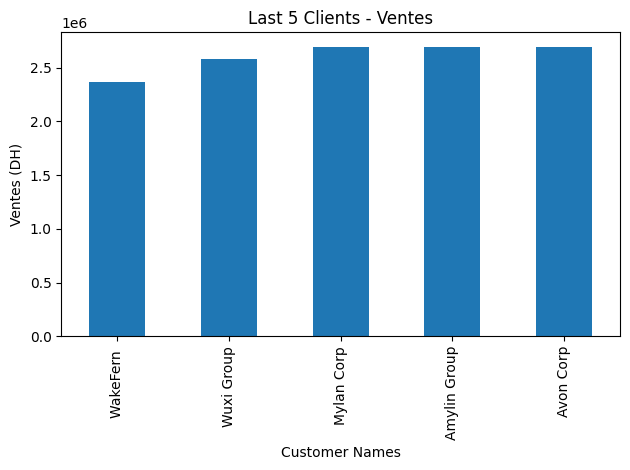

In [ ]:
# les last 5 des ventes par client et comparez-les avec celles de l’année précédente
bottom_clients = df.groupby("Customer Names")["Total Sales"].sum().sort_values(ascending=True).head(5)
bottom_clients.plot(kind="bar", title="Last 5 Clients - Ventes")
plt.ylabel("Ventes (DH)")
plt.tight_layout()
plt.show()